In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/exploring-coffee-sales-with-eda-and-visualization/Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
# Shape
print("Shape:", df.shape)

# Info
print(df.info())

# Missing values
print(df.isnull().sum())

# Summary statistics (numeric)
print(df.describe())

Shape: (3547, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64
       hour_of_day        money  Weekdaysort    Monthsort
co

In [9]:
# Fill missing numeric values with mean (if any)
df['money'] = df['money'].fillna(df['money'].mean())

# Fill missing categorical values with mode
df['coffee_name'] = df['coffee_name'].fillna(df['coffee_name'].mode()[0])
df['cash_type'] = df['cash_type'].fillna(df['cash_type'].mode()[0])
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
total_sales = df['money'].sum()
print("Total Sales:", total_sales)
avg_transaction = df['money'].mean()
print("Average Transaction Amount:", avg_transaction)
sales_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print("Sales by Coffee Type:\n", sales_by_coffee)
sales_by_payment = df.groupby('cash_type')['money'].sum()
print("Sales by Payment Method:\n", sales_by_payment)
avg_sales_by_hour = df.groupby('hour_of_day')['money'].mean()
print("Average Sales by Hour:\n", avg_sales_by_hour)
sales_by_weekday = df.groupby('Weekday')['money'].sum()
sales_by_month = df.groupby('Month_name')['money'].sum()
print("Sales by Weekday:\n", sales_by_weekday)
print("Sales by Month:\n", sales_by_month)


Total Sales: 112245.58
Average Transaction Amount: 31.645215675218495
Sales by Coffee Type:
 coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64
Sales by Payment Method:
 cash_type
card    112245.58
Name: money, dtype: float64
Average Sales by Hour:
 hour_of_day
6     29.880000
7     32.341136
8     29.863319
9     30.017686
10    31.093049
11    29.869611
12    30.786805
13    31.238933
14    31.883556
15    31.678051
16    32.488633
17    32.319662
18    32.855963
19    33.851354
20    33.011361
21    32.809949
22    32.169558
Name: money, dtype: float64
Sales by Weekday:
 Weekday
Fri    16802.66
Mon    17363.10
Sat    14733.52
Sun    13336.06
Thu    16091.40
Tue    18168.38
Wed    15750.46
Name: money, dtype: float64
Sales by Month:
 Month_nam

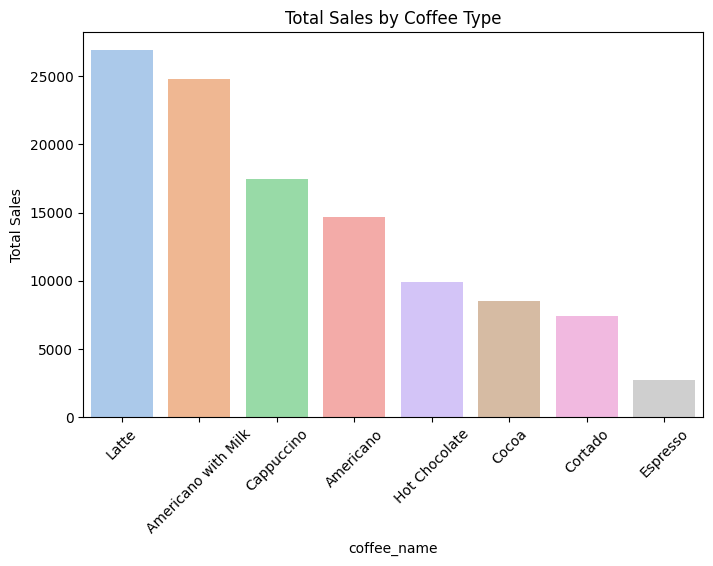

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_coffee.index, y=sales_by_coffee.values, palette='pastel')
plt.title("Total Sales by Coffee Type")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

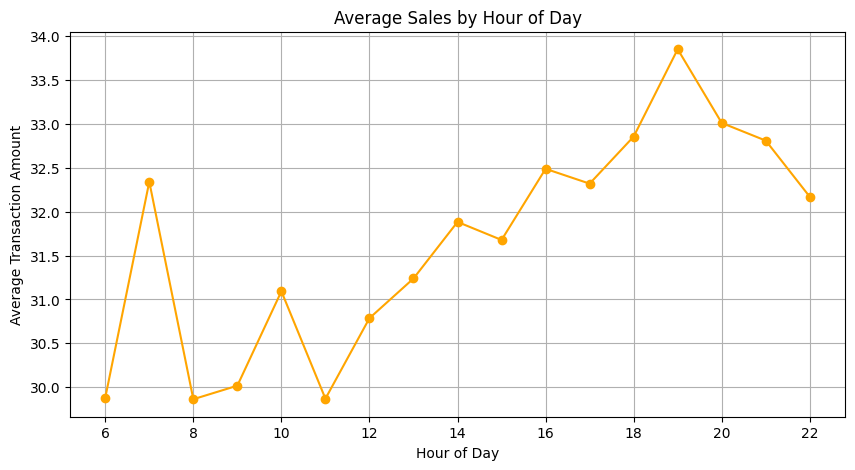

In [15]:
plt.figure(figsize=(10,5))
plt.plot(avg_sales_by_hour.index, avg_sales_by_hour.values, marker='o', color='orange')
plt.title("Average Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Transaction Amount")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


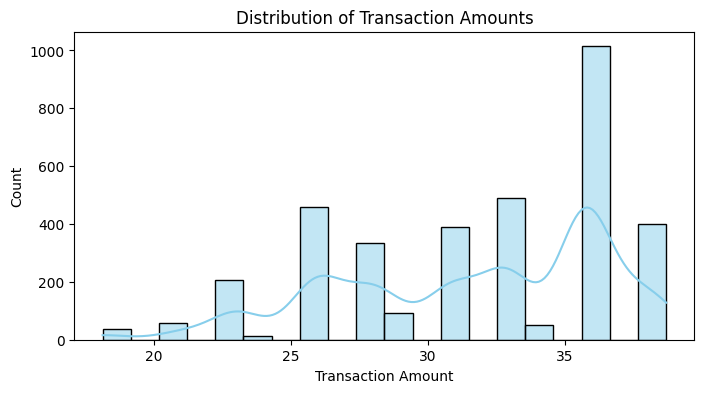

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(df['money'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.show()

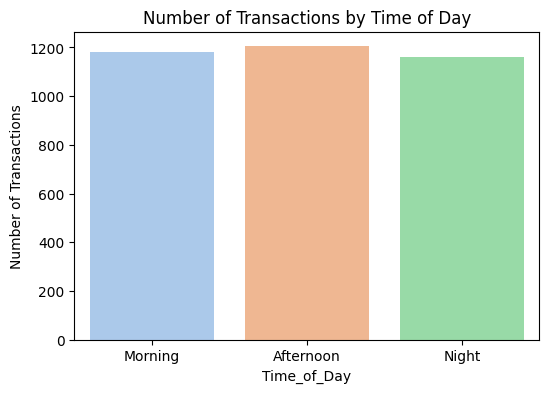

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='Time_of_Day', data=df, palette='pastel')
plt.title("Number of Transactions by Time of Day")
plt.ylabel("Number of Transactions")
plt.show()

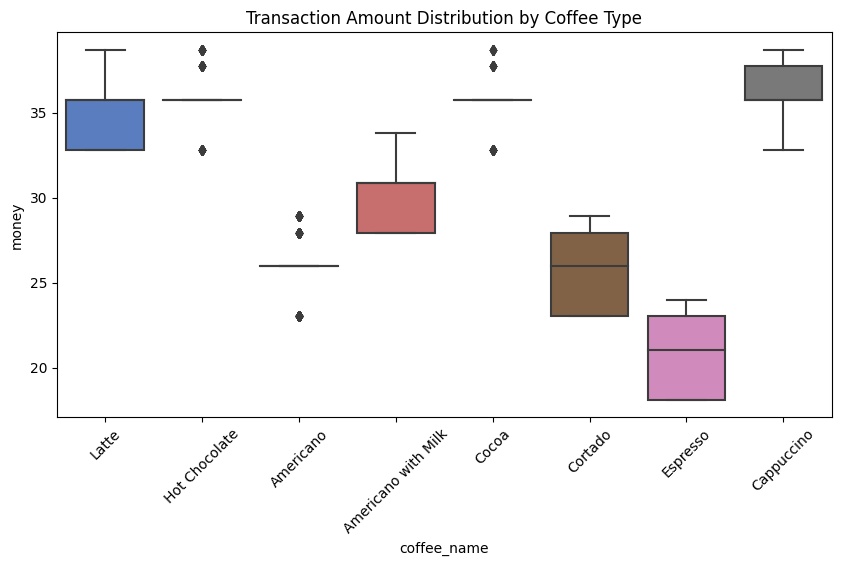

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x='coffee_name', y='money', data=df, palette='muted')
plt.title("Transaction Amount Distribution by Coffee Type")
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

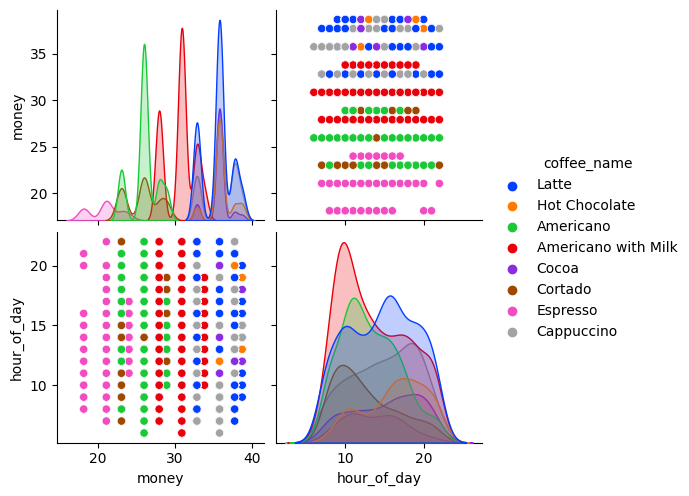

In [21]:
numeric_cols = ['money', 'hour_of_day']

# Pairplot with hue by coffee type
sns.pairplot(df[numeric_cols + ['coffee_name']], hue='coffee_name', palette='bright')
plt.show()

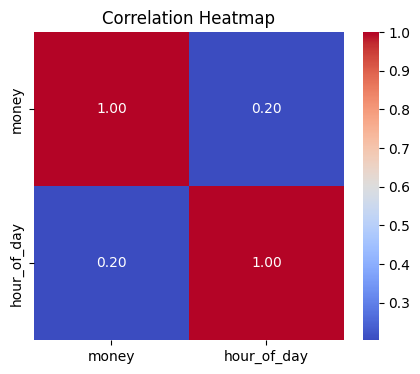

In [23]:
numeric_cols = ['money', 'hour_of_day']
corr = df[numeric_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()